# Car Price Prediction

### Motive
   We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy, etc. to meet certain price levels.
  
   I have selected the required used car prices dataset with the needed features and parameters from Kaggle. The required data is cleaned and pre-processed using machine learning techniques before applying any algorithm for predicting the price. Then after pre-processing and cleaning the data first need to apply train_test_split to keep the data in two parts for training and validation.


### Dataset description
   The dataset used for this project consists of the following columns:
    
   - Car_Name
   - Year
   - Selling_Price
   - Present_Price
   - Kms_Driven
   - Fuel_Type
   - Seller_Type
   - Transmission
   - Owner
    
### Steps

   - Import the needed libraries
   - Reading and understanding the data
   - Data Preprocessing
   - Exploratory Data Analysis 
   - Feature encosing
   - Train_Test_Split
   - Model Training

In [1]:
# import the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

- Importing data using the pandas library
- Understanding the structure of the data

In [2]:
# using pandas dataframe to read the data
df=pd.read_csv('car data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [6]:
df.shape

(301, 9)

In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
len(df['Car_Name'].unique())

# We have over 98 unique car names, so we will extract only the car brand from the car names

98

In [10]:
df["Brand_Name"]=df["Car_Name"].str.split(" ",expand=True)[0]

In [11]:
df["Brand_Name"].value_counts()

Brand_Name
city        26
Bajaj       25
Royal       17
corolla     17
Honda       17
Hero        15
verna       14
etios       11
fortuner    11
brio        10
innova       9
ciaz         9
i20          9
Yamaha       8
TVS          8
grand        8
amaze        7
jazz         7
eon          6
ertiga       6
alto         6
sx4          6
i10          5
swift        5
ritz         4
KTM          4
wagon        4
dzire        4
Activa       3
creta        3
xcent        3
elantra      2
ignis        1
vitara       1
s            1
Mahindra     1
Hyosung      1
baleno       1
omni         1
Suzuki       1
camry        1
land         1
UM           1
800          1
Name: count, dtype: int64

In [12]:
# we consider the "Brand_Name" instead of "Car_Name"

df.drop(['Car_Name'], axis = 1, inplace = True)

In [13]:
df["Year"].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [14]:
df['Age'] = 2023 - df['Year']

In [15]:
# we consider the "age" instead of "year"

df.drop(['Year'], axis = 1, inplace = True)

In [16]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Brand_Name,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift,9
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,city,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,brio,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,city,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,city,6


In [17]:
df['Kms_Driven'].describe().round()

count       301.0
mean      36947.0
std       38887.0
min         500.0
25%       15000.0
50%       32000.0
75%       48767.0
max      500000.0
Name: Kms_Driven, dtype: float64

## Exploratory Data Analysis ( EDA )

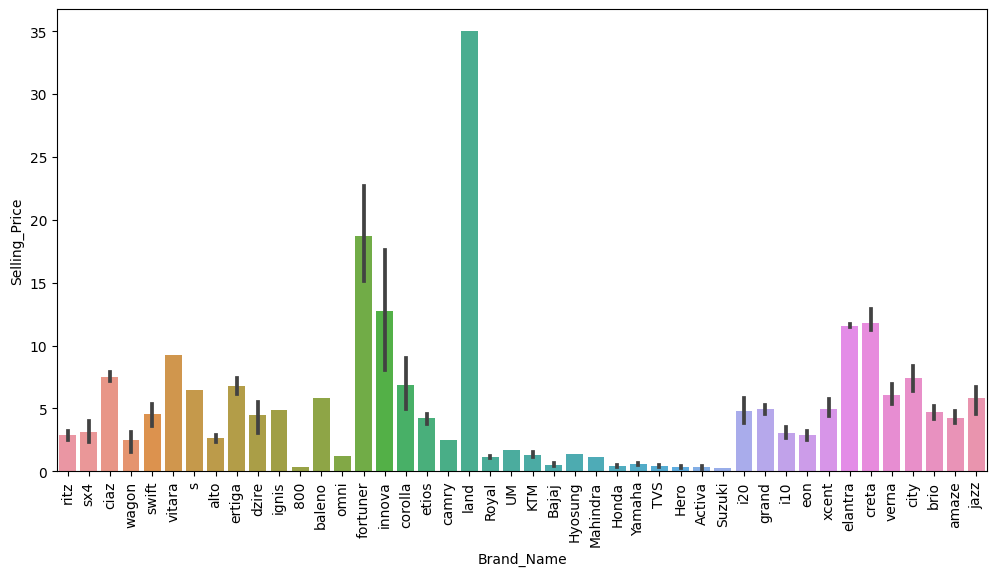

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x="Brand_Name",y="Selling_Price",data=df)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Age', ylabel='Selling_Price'>

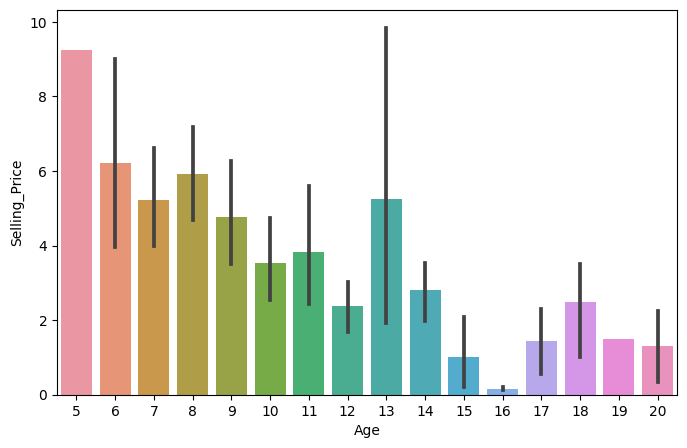

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x="Age",y="Selling_Price",data=df)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


<Axes: xlabel='Fuel_Type', ylabel='count'>

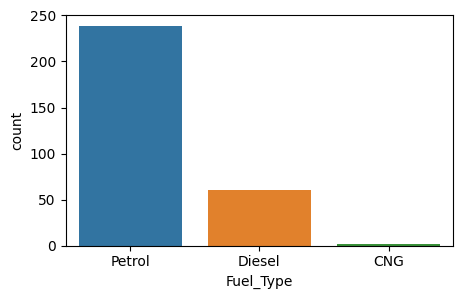

In [20]:
print(df["Fuel_Type"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Fuel_Type",data=df)

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


<Axes: xlabel='Seller_Type', ylabel='count'>

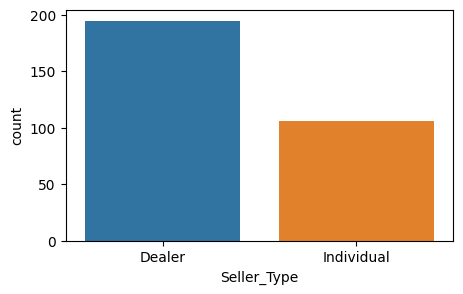

In [21]:
print(df["Seller_Type"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Seller_Type",data=df)

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


<Axes: xlabel='Transmission', ylabel='count'>

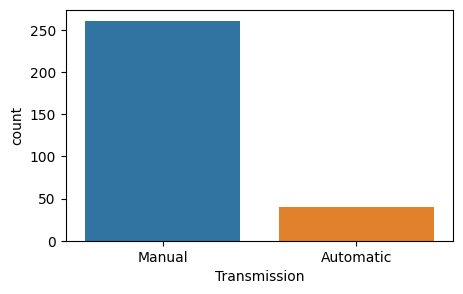

In [22]:
## How many are automatic and manual cars
print(df["Transmission"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="Transmission",data=df)

## Feature Encoding

In [23]:
# applying laberencoder to fit and transform the data
df[['Fuel_Type','Seller_Type','Transmission']]=df.loc[:,['Fuel_Type','Seller_Type','Transmission']].apply(LabelEncoder().fit_transform)

## Target and Lable

In [24]:
# we consider "selling_price" as target(y)
y=df.loc[:,['Selling_Price']].values
x=df.loc[:,['Age','Present_Price', 'Kms_Driven', 'Fuel_Type','Seller_Type', 'Transmission']].values

## Train_Test_Split


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123)

In [26]:
x_train.shape

(210, 6)

In [27]:
x_test.shape

(91, 6)

## MinMax Scaler

In [28]:
scaler.fit(x_train)

MinMaxScaler()

In [29]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Model Training

In [30]:
# using DecisionTreeRegressor to train model
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [31]:
print('Model_Score:',model.score(x_test,y_test)*100)

Model_Score: 95.52816318474176


In [32]:
# predict prices of X_test

y_pred=model.predict(x_test)

In [33]:
print("Mean Absolute Error : " ,metrics.mean_absolute_error(y_test,y_pred)*100)
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,y_pred)*100)
print("Root Mean Squared Error : " ,np.sqrt(metrics.mean_squared_error(y_test,y_pred))*100)
print("R2 Score: " ,metrics.r2_score(y_test,y_pred)*100)

Mean Absolute Error :  58.7032967032967
Mean Squared Error :  78.12087912087911
Root Mean Squared Error :  88.38601649632089
R2 Score:  95.52816318474176
